# Introduction

This notebook is used to simulate the Figure 2 in the paper: Karpicke, J. D., & Bauernschmidt, A. (2011). Spaced retrieval: Absolute spacing enhances learning regardless of relative spacing. Journal of Experimental Psychology: Learning, Memory, and Cognition, 37(5), 1250–1257. https://doi.org/10.1037/a0023436

The main difference between this simulation and the experiment of paper is: the interval between two trials is unclear in the experiment. Seems like the interval is shorter than 1 day. In this simulation, the unit of interval is 1 day.

Note: FSRS and SM-2 don't belong to the gradually expanding spacing schedule described in the paper. FSRS and SM-2 only expand the spacing when the recall is correct. The gradually expanding spacing schedule described in the paper expands the spacing regardless of the recall result. So the criticism of the expanding schedules is not applicable to FSRS and SM-2.

In [1]:
from fsrs_optimizer import Collection, DEFAULT_WEIGHT, power_forgetting_curve
from itertools import product
import numpy as np


verbose = False

col = Collection(DEFAULT_WEIGHT)
col.model.w.data[0:4] *= 30
first_rating = 1
init_stability = float(col.predict("0", f"{first_rating}")[0])
test_interval = 365

condition = {
    "short": {
        "expand": (1, 5, 9),
        "equal": (5, 5, 5),
        "contract": (9, 5, 1),
    },
    "medium": {
        "expand": (5, 10, 15),
        "equal": (10, 10, 10),
        "contract": (15, 10, 5),
    },
    "long": {
        "expand": (15, 30, 45),
        "equal": (30, 30, 30),
        "contract": (45, 30, 15),
    },
}

results = []

for absolute_spacing, groups in condition.items():
    group_results = []
    print(f"Absolute spacing: {absolute_spacing}")
    for relative_spacing, intervals in groups.items():
        print(f"Relative spacing: {relative_spacing}")
        proportions = []
        final_stabilities = []
        proportion_seqs = []
        recall_prob_seqs = []
        for ratings in product([1, 3], repeat=3):
            proportion = 1
            ivl_seq = [0]
            rating_seq = [first_rating]
            recall_prob_seq = []
            stability = init_stability
            stability_seq = [round(stability, 2)]
            proportion_seq = [1]
            for ivl, rating in zip(intervals, ratings):
                ivl_seq.append(ivl)
                rating_seq.append(rating)
                R = power_forgetting_curve(ivl, stability)
                recall_prob_seq.append(round(R, 2))
                stability = float(
                    col.predict(
                        ",".join(map(str, ivl_seq)), ",".join(map(str, rating_seq))
                    )[0]
                )
                stability_seq.append(round(stability, 2))
                if rating == 1:  # forget
                    proportion *= 1 - R
                else:  # recall
                    proportion *= R
                proportion_seq.append(proportion)
            proportions.append(proportion)
            final_stabilities.append(stability)
            recall_prob_seq.append(
                round(power_forgetting_curve(test_interval, stability), 2)
            )
            if verbose:
                print(
                    f"Ratings: {ratings}, proportion: {proportion:.3f}, recall_prob_seq: {recall_prob_seq}, stability_seq: {stability_seq}"
                )
            proportion_seqs.append(proportion_seq)
            recall_prob_seqs.append(recall_prob_seq)

        retentions = sum(
            np.array(proportion_seqs)
            * np.array(recall_prob_seqs)
            / sum(np.array(proportion_seqs))
        )
        final_performance = retentions[-1]
        print(f"Intervals: {intervals + (test_interval,)}")
        print(f"Retentions: {tuple(retentions.round(4))}")
        print(f"Final performance: {final_performance * 100:.2f}%")
        group_results.append(final_performance)
    results.append(group_results)

Absolute spacing: short
Relative spacing: expand
Intervals: (1, 5, 9, 365)
Retentions: (0.99, 0.9691, 0.9531, 0.5369)
Final performance: 53.69%
Relative spacing: equal
Intervals: (5, 5, 5, 365)
Retentions: (0.97, 0.9754, 0.9745, 0.5394)
Final performance: 53.94%
Relative spacing: contract
Intervals: (9, 5, 1, 365)
Retentions: (0.94, 0.9725, 0.9983, 0.5272)
Final performance: 52.72%
Absolute spacing: medium
Relative spacing: expand
Intervals: (5, 10, 15, 365)
Retentions: (0.97, 0.943, 0.9427, 0.5999)
Final performance: 59.99%
Relative spacing: equal
Intervals: (10, 10, 10, 365)
Retentions: (0.94, 0.9467, 0.9554, 0.6014)
Final performance: 60.14%
Relative spacing: contract
Intervals: (15, 10, 5, 365)
Retentions: (0.91, 0.9501, 0.9787, 0.59)
Final performance: 59.00%
Absolute spacing: long
Relative spacing: expand
Intervals: (15, 30, 45, 365)
Retentions: (0.91, 0.8865, 0.8817, 0.6838)
Final performance: 68.38%
Relative spacing: equal
Intervals: (30, 30, 30, 365)
Retentions: (0.84, 0.8807,

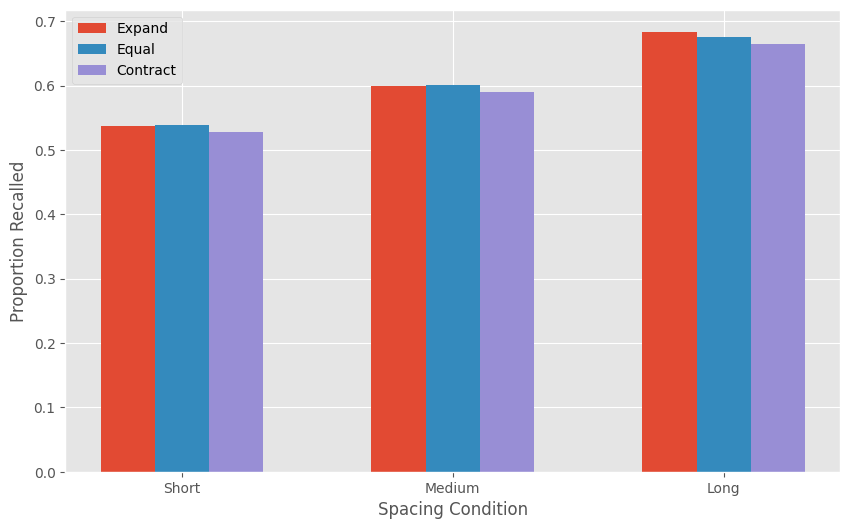

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

groups = ['Short', 'Medium', 'Long']
subgroups = ['Expand', 'Equal', 'Contract']
values = np.array(results)

plt.figure(figsize=(10, 6))

bar_width = 0.2

group_pos = np.arange(len(groups))
subgroup_pos = np.arange(len(subgroups))

for i, subgroup in enumerate(subgroups):
    plt.bar(group_pos + i * bar_width, values[:, i], width=bar_width, label=subgroup)

plt.legend()
plt.xticks(group_pos + bar_width, groups)
plt.xlabel('Spacing Condition')
plt.ylabel('Proportion Recalled')
plt.savefig("simulated.jpg")
plt.show()

The original figure 2 in the paper:

![img](original.jpg)